STAT 515 Project2

1.

In [79]:
#import package
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [80]:
#construct simCorn function
def simCorn(overallEffect=0, fertilizerEffect=[0,0,0],rowEffect=[0,0,0], colEffect=[0,0,0],
            seed=None, dist=np.random.normal,**attributes):  
    if seed is not None:
        if isinstance(seed, int):
            seed=np.random.seed(seed)
        else:
            sys.exit("Non NULL or Integer Seed")
        
    df=pd.DataFrame()
    df['Fertilizer']=np.array(["A","B","C","C","A","B","B","C","A"])
    df['Row']=np.array([0,0,0,1,1,1,2,2,2])
    df['Column']=np.array([0,1,2,0,1,2,0,1,2])

    
    e = np.random.normal(0,1,9)
    Yield=[]
    Ferint = [0,1,2,2,0,1,1,2,0]
    for k in range(9):
        Yield.append(overallEffect + fertilizerEffect[Ferint[k]] + rowEffect[df['Row'][k]] + colEffect[df['Column'][k]] + np.random.normal())
    df['Yield']=Yield
    return df

2.

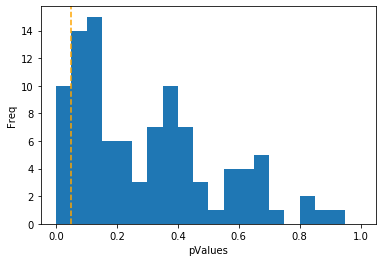

In [81]:
pValues=[]
for k in range(100):
    y3 = simCorn(10, [1,2,3],[1,0,1], [0,1,0], dist = np.random.exponential(1))
    pValues.append(sm.stats.anova_lm(smf.ols(formula="Yield ~ Fertilizer + Row + Column", data=y3).fit(),type=2)['PR(>F)'][0])
plt.hist(pValues,bins=20,range=(0,1))
plt.xlabel('pValues')
plt.ylabel('Freq')
plt.axvline(.05,color='orange',linestyle='dashed')